In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [589]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [218]:
!wget $data -O data_for_churn.csv

--2023-03-02 12:09:10--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'data_for_churn.csv'

     0K .......... .......... .......... .......... ..........  5%  252K 4s
    50K .......... .......... .......... .......... .......... 10%  421K 3s
   100K .......... .......... .......... .......... .......... 15%  536K 2s
   150K .......... .......... .......... .......... .......... 20%  353K 2s
   200K .......... .......... .......... .......... .......... 26% 3.98M 2s
   250K .......... .......... .......... .......... .......... 31%  553K 1s
   300K .......... .......... .......... .

In [590]:
df = pd.read_csv("data_for_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [591]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


In [592]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [593]:
tc=pd.to_numeric(df.totalcharges, errors='coerce')

In [594]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [595]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [596]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [597]:
df.churn = (df.churn == 'yes').astype(int)

In [598]:
from sklearn.model_selection import train_test_split

In [599]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [600]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [601]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [602]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [603]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [604]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [605]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [606]:
df_full_train = df_full_train.reset_index(drop=True)

In [609]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [610]:
global_churn_rate = df_full_train.churn.mean().round(2)
global_churn_rate

0.27

In [611]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [612]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 
               'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

In [613]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [614]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [615]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [616]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [617]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [618]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [619]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [620]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [621]:
global_churn_rate - churn_partner

0.06493474245795922

In [622]:
churn_partner/global_churn_rate

0.7594724924338315

In [623]:
churn_no_partner/global_churn_rate

1.2216593879412643

In [624]:
from IPython.display import display

In [625]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [626]:
from sklearn.metrics import mutual_info_score

In [627]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [628]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [629]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)


In [630]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [631]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [632]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [633]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [634]:
from sklearn.feature_extraction import DictVectorizer

In [635]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [636]:
X_train.shape

(4225, 45)

In [637]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.7991483321504613

In [638]:
model.intercept_[0]

-0.13093702066940982

In [639]:
model.coef_[0].round(3)

array([ 0.573, -0.166, -0.538, -0.016, -0.114,  0.076, -0.114, -0.093,
       -0.026, -0.105, -0.353,  0.336, -0.114,  0.001, -0.171,  0.112,
       -0.072,  0.12 , -0.114, -0.137,  0.263, -0.114, -0.28 , -0.207,
        0.076, -0.107, -0.024, -0.056, -0.116,  0.208, -0.167,  0.112,
       -0.243,  0.251, -0.099, -0.114,  0.081, -0.094, -0.114,  0.077,
        0.203, -0.114, -0.22 , -0.065,  0.   ])

In [640]:
df_val[churn_decision].customerid.head()

10    6551-gnydg
16    0689-nkylf
18    3398-fshon
19    4704-eryfc
26    8258-gstjk
Name: customerid, dtype: object

In [641]:
y_val

array([0, 1, 0, ..., 0, 0, 0])

In [642]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [643]:
df_pred = pd.DataFrame()
df_pred['customerid'] = df_val.customerid
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['probability'] = y_pred

In [644]:
df_pred.head()

,customerid,prediction,actual,probability
0,1697-nvvgy,0,0,0.232001
1,6849-oyamu,0,1,0.247736
2,7921-lmdfq,0,0,0.277133
3,3331-hqdtw,0,1,0.355824
4,1904-wajaa,0,0,0.053981


In [645]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [646]:
df_pred

,customerid,prediction,actual,probability,correct
0,1697-nvvgy,0,0,0.232001,True
1,6849-oyamu,0,1,0.247736,False
2,7921-lmdfq,0,0,0.277133,True
3,3331-hqdtw,0,1,0.355824,False
4,1904-wajaa,0,0,0.053981,True
...,...,...,...,...,...
1404,5468-bpmmo,0,0,0.028544,True
1405,4273-mbhya,1,0,0.786681,False
1406,5743-khmna,0,0,0.002268,True
1407,7940-uqqug,0,0,0.122578,True


In [647]:
df_pred.correct.mean()

0.7991483321504613

In [648]:
dv.get_feature_names()

c:\Users\OLAMIDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [649]:
model.coef_[0].round(3)

array([ 0.573, -0.166, -0.538, -0.016, -0.114,  0.076, -0.114, -0.093,
       -0.026, -0.105, -0.353,  0.336, -0.114,  0.001, -0.171,  0.112,
       -0.072,  0.12 , -0.114, -0.137,  0.263, -0.114, -0.28 , -0.207,
        0.076, -0.107, -0.024, -0.056, -0.116,  0.208, -0.167,  0.112,
       -0.243,  0.251, -0.099, -0.114,  0.081, -0.094, -0.114,  0.077,
        0.203, -0.114, -0.22 , -0.065,  0.   ])

In [650]:
model.intercept_[0]

-0.13093702066940982

In [651]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.573,
 'contract=one_year': -0.166,
 'contract=two_year': -0.538,
 'dependents=no': -0.016,
 'dependents=yes': -0.114,
 'deviceprotection=no': 0.076,
 'deviceprotection=no_internet_service': -0.114,
 'deviceprotection=yes': -0.093,
 'gender=female': -0.026,
 'gender=male': -0.105,
 'internetservice=dsl': -0.353,
 'internetservice=fiber_optic': 0.336,
 'internetservice=no': -0.114,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.171,
 'multiplelines=no_phone_service': 0.112,
 'multiplelines=yes': -0.072,
 'onlinebackup=no': 0.12,
 'onlinebackup=no_internet_service': -0.114,
 'onlinebackup=yes': -0.137,
 'onlinesecurity=no': 0.263,
 'onlinesecurity=no_internet_service': -0.114,
 'onlinesecurity=yes': -0.28,
 'paperlessbilling=no': -0.207,
 'paperlessbilling=yes': 0.076,
 'partner=no': -0.107,
 'partner=yes': -0.024,
 'paymentmethod=bank_transfer_(automatic)': -0.056,
 'paymentmethod=credit_card_(automatic)': -0.116,
 'paymentmethod=electronic_check': 0.208,

Using The Model

In [673]:
dicts_train_full = df_full_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_train_full)
y_full_train = df_full_train.churn.values

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_full_train, y_full_train)

LogisticRegression(random_state=1, solver='liblinear')

In [677]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]
churn_decision = (y_pred >= 0.5)

In [690]:
(y_test == churn_decision).mean()

0.8126330731014905

In [691]:
1132/1409

0.8034066713981547

In [692]:
from sklearn.metrics import accuracy_score

In [693]:
accuracy_score(y_test, y_pred >= 0.5)

0.8126330731014905

In [698]:
thresholds = np.linspace(0, 1, 21)
scores = []
for t in thresholds:
    score = accuracy_score(y_test, y_pred >= t)
    print("%.2f %.3f" % (t, score))
    scores.append(score)

0.00 0.247
0.05 0.492
0.10 0.608
0.15 0.674
0.20 0.710
0.25 0.742
0.30 0.764
0.35 0.776
0.40 0.791
0.45 0.800
0.50 0.813
0.55 0.814
0.60 0.813
0.65 0.804
0.70 0.796
0.75 0.776
0.80 0.759
0.85 0.753
0.90 0.753
0.95 0.753
1.00 0.753


In [699]:
scores

[0.24698367636621718,
 0.4918381831085876,
 0.6075230660042583,
 0.674237047551455,
 0.7097232079489,
 0.7423704755145494,
 0.7636621717530163,
 0.7764371894960965,
 0.7913413768630234,
 0.7998580553584103,
 0.8126330731014905,
 0.8140525195173882,
 0.8133427963094393,
 0.8041163946061036,
 0.7955997161107168,
 0.7764371894960965,
 0.758694109297374,
 0.7530163236337828,
 0.7530163236337828,
 0.7530163236337828,
 0.7530163236337828]

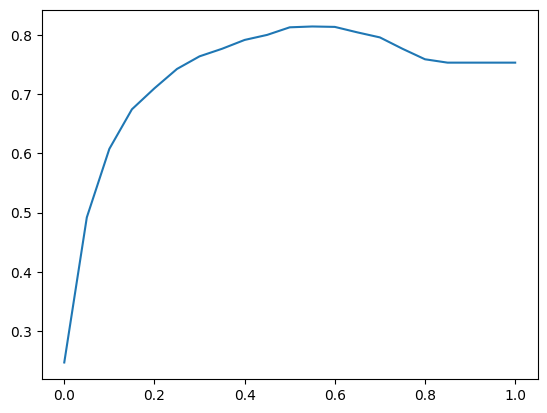

In [700]:
plt.plot(thresholds, scores)

In [765]:
from collections import Counter

In [766]:
Counter(y_pred >= 1.0)

Counter({False: 1126})

In [767]:
1 - y_val.mean()

0.7211367673179396

Confusion Table

In [768]:
actual_postive = (y_val == 1)
actual_negative = (y_val == 0)

In [769]:
t = 0.5
predicted_positive = (y_pred >= t)
predicted_negative = (y_pred < t)

In [770]:
tp = (predicted_positive & actual_postive).sum()
tn = (predicted_negative & actual_negative).sum()

fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_postive).sum()

In [771]:
tp, tn, fp, fn

(178, 727, 85, 136)

In [772]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[727,  85],
       [136, 178]])

In [773]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.16]])

In [774]:
from sklearn.metrics import confusion_matrix

In [775]:
confusion_matrix(y_val, y_pred >= 0.5)

array([[727,  85],
       [136, 178]], dtype=int64)

Precision and Recall

In [776]:
precision = tp / (tp + fp) 

In [777]:
precision

0.6768060836501901

In [778]:
recall = tp / (tp + fn)
recall

0.5668789808917197

In [779]:
from sklearn.metrics import precision_score, recall_score

In [780]:
precision_score(y_val, y_pred >= 0.5)

0.6768060836501901

In [781]:
recall_score(y_val, y_pred >= 0.5)

0.5668789808917197

Roc curve

TPR and FPR

In [784]:
tpr = tp/(tp+fn)
tpr

0.5668789808917197

In [785]:
fpr = fp/(fp+tn)
fpr

0.10467980295566502

In [791]:
scores = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)

    tp = (predicted_positive & actual_positive).sum()
    tn = (predicted_negative & actual_negative).sum()
    
    fp = (predicted_positive & actual_negative).sum()
    fn = (predicted_negative & actual_positive).sum()
    scores.append((t, tp, tn, fp, fn))

In [792]:
columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
df_scores = pd.DataFrame(scores, columns = columns)

In [793]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [794]:
df_scores[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,314,0,812,0,1.000000,1.000000
10,0.1,300,393,419,14,0.955414,0.516010
20,0.2,271,524,288,43,0.863057,0.354680
30,0.3,247,629,183,67,0.786624,0.225369
40,0.4,211,679,133,103,0.671975,0.163793
50,0.5,178,727,85,136,0.566879,0.104680
60,0.6,120,765,47,194,0.382166,0.057882
70,0.7,62,805,7,252,0.197452,0.008621
80,0.8,6,811,1,308,0.019108,0.001232
90,0.9,0,812,0,314,0.000000,0.000000


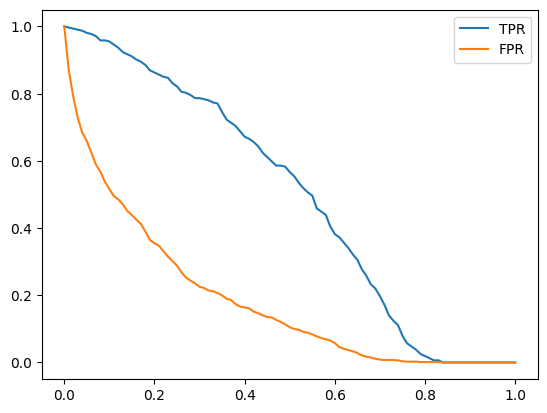

In [795]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

Random Model

In [796]:
np.random.seed(1)

In [797]:
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.582, 0.293, 0.929])

In [798]:
((y_rand >= 0.5) == y_val).mean()

0.49822380106571934

In [799]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predicted_positive = (y_pred >= t)
        predicted_negative = (y_pred < t)

        tp = (predicted_positive & actual_positive).sum()
        tn = (predicted_negative & actual_negative).sum()
        fp = (predicted_positive & actual_negative).sum()
        fn = (predicted_negative & actual_positive).sum()
        scores.append((t, tp, tn, fp, fn))

    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns = columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

In [800]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [801]:
df_rand[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,314,0,812,0,1.000000,1.000000
10,0.1,288,88,724,26,0.917197,0.891626
20,0.2,263,179,633,51,0.837580,0.779557
30,0.3,226,248,564,88,0.719745,0.694581
40,0.4,194,317,495,120,0.617834,0.609606
50,0.5,161,400,412,153,0.512739,0.507389
60,0.6,127,486,326,187,0.404459,0.401478
70,0.7,96,571,241,218,0.305732,0.296798
80,0.8,62,648,164,252,0.197452,0.201970
90,0.9,35,735,77,279,0.111465,0.094828


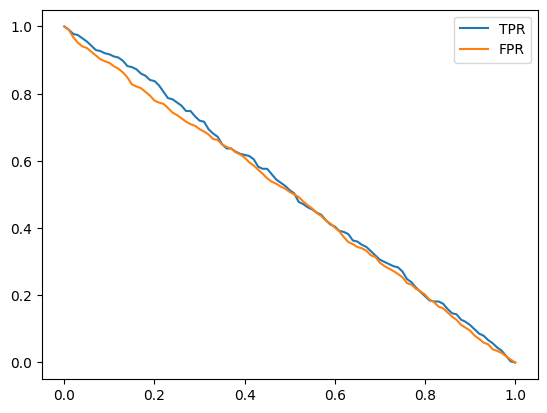

In [802]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

Ideal Model

In [803]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

In [804]:
num_neg, num_pos

(812, 314)

In [805]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [806]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [807]:
(1 - y_val).mean()

0.7211367673179396

In [808]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

0.9955595026642984

In [809]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [810]:
df_ideal[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,314,0,812,0,1.000000,1.000000
10,0.1,314,113,699,0,1.000000,0.860837
20,0.2,314,225,587,0,1.000000,0.722906
30,0.3,314,338,474,0,1.000000,0.583744
40,0.4,314,450,362,0,1.000000,0.445813
50,0.5,314,563,249,0,1.000000,0.306650
60,0.6,314,675,137,0,1.000000,0.168719
70,0.7,314,788,24,0,1.000000,0.029557
80,0.8,226,812,0,88,0.719745,0.000000
90,0.9,113,812,0,201,0.359873,0.000000


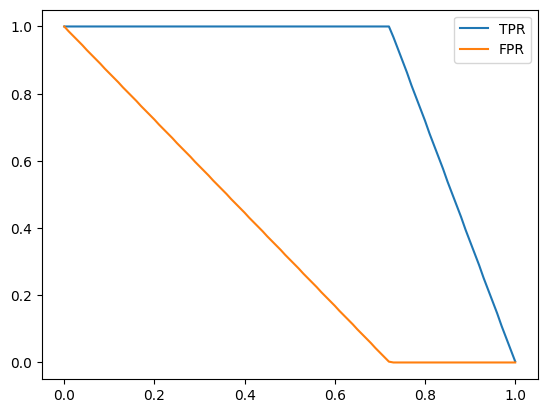

In [811]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

Putting Everything Together

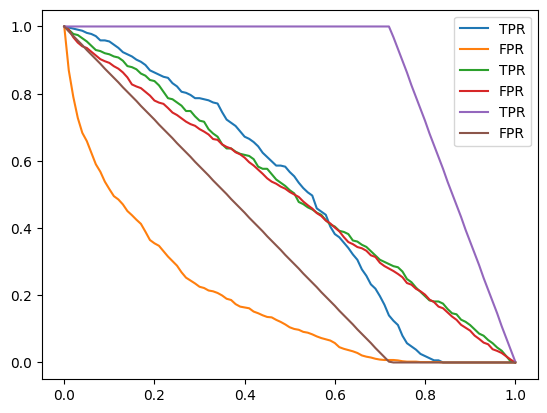

In [812]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')

plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')

plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')

plt.legend()

<Figure size 600x600 with 0 Axes>

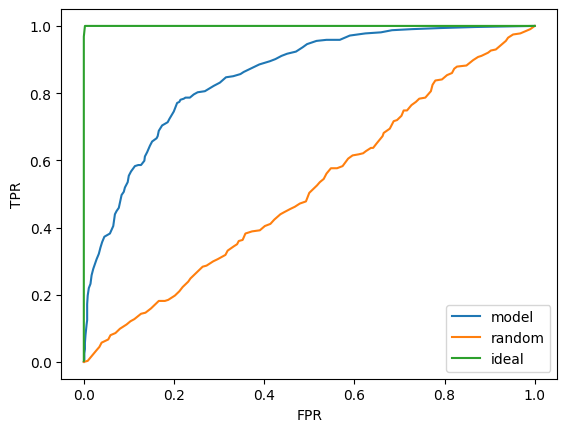

<Figure size 600x600 with 0 Axes>

In [813]:
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.figure(figsize=(6, 6))

In [814]:
from sklearn.metrics import roc_curve

In [815]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

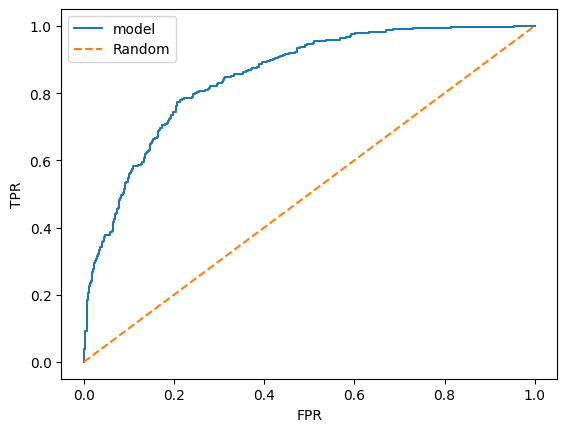

In [817]:
plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()

ROC AUC

In [818]:
from sklearn.metrics import auc

In [819]:
auc(fpr, tpr)

0.8511146496815285

In [820]:
auc(df_scores.fpr, df_scores.tpr)

0.8510617018606257

In [821]:
from sklearn.metrics import roc_auc_score

In [822]:
roc_auc_score(y_val, y_pred)

0.8511146496815285

In [823]:
neg = (y_val == 0)
pos = (y_val == 1)

In [824]:
import random

In [825]:
n = 100000
success = 0
for i in range(n):
    pos_ind = random.randint(0, len(pos)-1)
    neg_ind = random.randint(0, len(neg)-1)
    if pos[pos_ind] > neg[neg_ind]:
        success += 1
        
success/n        

0.07654

Cross Validation

In [826]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [827]:
dv, model = train(df_train, y_train, C=0.0001)

In [828]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [829]:
y_pred = predict(df_val, dv, model)

In [830]:
from sklearn.model_selection import KFold

In [831]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [832]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [833]:
from tqdm.auto import tqdm

In [838]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []  # reset the scores list for each value of C

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.840 +- 0.008
C=0.01 0.840 +- 0.008
C=0.1 0.840 +- 0.008
C=0.5 0.840 +- 0.008
C=1 0.840 +- 0.008
C=5 0.840 +- 0.008
C=10 0.840 +- 0.008


In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=0.1)
y_pred = predict(df_test, dv, model)
    
auc = roc_auc_score(y_test, y_pred)
auc

0.8588175869652357